Solution finale:  [[499, 499], [498, 498], [498, 497], [496, 494], [494, 493], [491, 488], [485, 483], [482, 481], [480, 479], [477, 477], [476, 476], [472, 472], [471, 470], [468, 468], [467, 467], [466, 465], [464, 464], [464, 463], [463, 462], [462, 462], [462, 462], [461, 461], [460, 460], [460, 459], [459, 458], [457, 455], [454, 454], [454, 453], [452, 451], [451, 451], [449, 448], [447, 446], [445, 445], [444, 444], [444, 443], [442, 441], [441, 440], [439, 439], [438, 438], [438, 438], [438, 435], [434, 434], [433, 433], [431, 431], [429, 429], [428, 428], [426, 425], [425, 424], [423, 423], [423, 423], [423, 422], [420, 419], [417, 414], [413, 412], [412, 412], [411, 408], [405, 405], [404, 402], [402, 402], [402, 400], [398, 395], [395, 390], [390, 388], [386, 385], [384, 383], [382, 381], [380, 379], [379, 377], [377, 376], [375, 375, 250], [375, 373, 252], [373, 373, 254], [372, 372, 256], [371, 371, 258], [370, 369, 261], [369, 369, 262], [369, 368, 263], [368, 368, 264], 

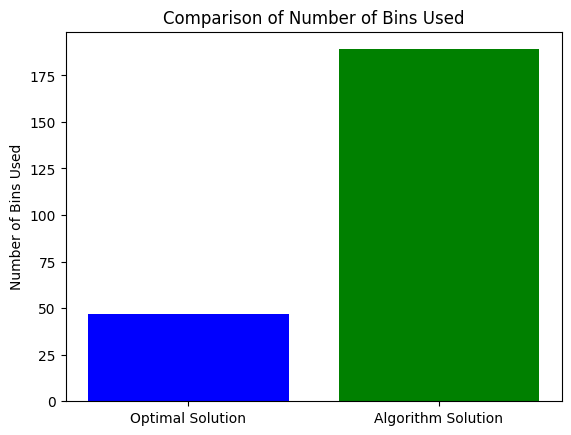

In [12]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Liste des heuristiques disponibles
heuristics = ['FF', 'NF', 'BF', 'WF']

def first_fit(bins, packet):
    for bin in bins:
        if sum(bin) + packet <= bin_capacity:  # Ajout de la vérification de la capacité
            bin.append(packet)
            return bins
    bins.append([packet])  # Créer un nouveau bac si aucun bac approprié n'est trouvé
    return bins

def next_fit(bins, packet):
    if bins and sum(bins[-1]) + packet <= bin_capacity:
        bins[-1].append(packet)
    else:
        bins.append([packet])  # Créer un nouveau bac si aucun bac approprié n'est trouvé
    return bins

def best_fit(bins, packet):
    best_bin_idx = -1
    min_remaining_space = float('inf')
    for idx, bin in enumerate(bins):
        remaining_space = bin_capacity - sum(bin)
        if remaining_space >= packet and remaining_space < min_remaining_space:
            best_bin_idx = idx
            min_remaining_space = remaining_space
    if best_bin_idx != -1:
        bins[best_bin_idx].append(packet)
    else:
        bins.append([packet])  # Créer un nouveau bac si aucun bac approprié n'est trouvé
    return bins

def worst_fit(bins, packet):
    worst_bin_idx = -1
    max_remaining_space = -1
    for idx, bin in enumerate(bins):
        remaining_space = bin_capacity - sum(bin)
        if remaining_space >= packet and remaining_space > max_remaining_space:
            worst_bin_idx = idx
            max_remaining_space = remaining_space
    if worst_bin_idx != -1:
        bins[worst_bin_idx].append(packet)
    else:
        bins.append([packet])  # Créer un nouveau bac si aucun bac approprié n'est trouvé
    return bins

# Fonction pour générer un chromosome aléatoire avec une longueur fixe
def generate_random_chromosome(chromosome_length):
    return ''.join(random.choices(heuristics, k=chromosome_length))

# Fonction pour générer la population initiale avec des chromosomes de même longueur
def generate_initial_population(population_size, chromosome_length):
    population = []
    for _ in range(population_size):
        chromosome = generate_random_chromosome(chromosome_length)
        population.append(chromosome)
    return population

# Sélection par tournoi
def tournament_selection(population, tournament_size):
    selected = []
    while len(selected) < tournament_size:
        contestants = random.sample(population, tournament_size)  # Sélectionner des individus aléatoires
        winner = min(contestants, key=fitness_function)           # Sélectionner le meilleur individu
        selected.append(winner)                                   # Ajouter le gagnant à la liste des sélectionnés
    return selected

# Croisement en deux points
def crossover(parent1, parent2):
    length = len(parent1)
    point1 = random.randint(1, length - 1)    # Premier point de croisement
    point2 = random.randint(point1, length - 1)    # Deuxième point de croisement
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]  # Croisement des parents
    child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]  # Croisement des parents
    return child1, child2

# Mutation
def mutation(child, mutation_rate=0.1):
    if random.random() < mutation_rate:
        index = random.randint(0, len(child) - 1)  # Choix aléatoire d'un indice de chromosome
        new_heuristic = random.choice(heuristics)  # Sélection aléatoire d'une nouvelle heuristique
        child = child[:index] + new_heuristic + child[index + 1:]  # Mutation
    return child



def fitness_function(chromosome, weight_optimality=1.0, weight_complexity=0.1):
    optimalities = {'N': 2, 'F': 1.7, 'B': 1.7, 'W': 1.9}
    complexities = {'N': 1, 'F': 2, 'B': 2, 'W': 2}  # O(n) = 1, O(n^2) = 2

    total_optimality = sum(optimalities.get(gene, 0) for gene in chromosome)
    total_complexity = sum(complexities.get(gene, 0) for gene in chromosome)

    fitness = (weight_optimality * total_optimality) + (weight_complexity * total_complexity)
    return fitness


# Trouver le meilleur chromosome dans une population
def best_chromosome(chromosomes):
    best_chromosome = None
    best_fitness = float('inf') # Initialiser à l'infini pour trouver la plus petite valeur
    for chromosome in chromosomes:
        fitness = fitness_function(chromosome)
        if fitness < best_fitness:
            best_fitness = fitness
            best_chromosome = chromosome
    return best_chromosome

def genetic_algorithm(population, population_size, max_iteration):
    for _ in range(max_iteration):
        parents = tournament_selection(population, tournament_size=2)
        childs = crossover(parents[0], parents[1])
        childs = [mutation(child) for child in childs]

        population.extend(childs)
        population = sorted(population, key=fitness_function)

        population = population[:population_size]

    return population

def hyper_heuristic_algorithm(population_size, initial_population, num_bins, items, max_iteration):
    solution = []
    current_population = initial_population
    current_items = items

    while current_items:
        selected_chromosome = best_chromosome(current_population)
        for gene in selected_chromosome:
            if current_items:  # Vérifiez si current_items n'est pas vide
                if gene == 'B':
                    solution = best_fit(solution, current_items[0])
                elif gene == 'F':
                    solution = first_fit(solution, current_items[0])
                elif gene == 'W':
                    solution = worst_fit(solution, current_items[0])
                elif gene == 'N':
                    solution = next_fit(solution, current_items[0])
                current_items.remove(current_items[0])
            else:
                break

        current_population = genetic_algorithm(current_population, population_size, max_iteration)

    return solution

# Lire les données à partir d'un fichier
def read_data_from_file(filename):
    with open(filename, 'r') as file:
        num_bins = int(file.readline().strip())                    # Nombre de bacs
        bin_capacity = int(file.readline().strip())                # Capacité des bacs
        items = []
        for line in file:
            items.extend(map(int, line.strip().split()))          # Ajouter les objets à la liste
        return num_bins, bin_capacity, items

def plot_solution(solution, optimal_solution):
    fig, ax = plt.subplots()
    bins_used = len(solution)
    ax.bar(["Optimal Solution", "Algorithm Solution"], [optimal_solution, bins_used], color=['blue', 'green'])
    ax.set_ylabel('Number of Bins Used')
    ax.set_title('Comparison of Number of Bins Used')
    plt.show()

if __name__ == "__main__":

    filename = "benchmark_Falkenauer_t501.txt"  # Nom du fichier d'entrée
    num_bins, bin_capacity, items = read_data_from_file(filename)  # Lire les données à partir du fichier


    population_size = 10
    chromosome_length = 5  # Longueur fixe de chaque chromosome
    max_iteration = 20
    initial_population = generate_initial_population(population_size, chromosome_length)

    start_time = time.time()

    solution = hyper_heuristic_algorithm(population_size, initial_population, num_bins, items, max_iteration)

    end_time = time.time()
    execution_time = end_time - start_time


    print("Solution finale: ", solution)
    print("Nombre de bins: ",len(solution))
    print("Temps d'exécution: {:.5f} secondes".format(execution_time))

    plot_solution(solution, optimal_solution=47)



La solution proposée utilise un algorithme d'hyper-heuristique combiné à un algorithme génétique pour résoudre un problème d'allocation de bacs. L'algorithme commence par générer une population initiale de solutions représentées par des chromosomes composés d'une séquence d'heuristiques. Ensuite, il applique une stratégie d'hyper-heuristique pour sélectionner les heuristiques à utiliser pour allouer les objets aux bacs. L'algorithme évalue chaque solution en tenant compte à la fois de l'efficacité de l'allocation et de la complexité de l'algorithme utilisé. Les solutions sont améliorées itérativement à l'aide d'un algorithme génétique, qui comprend des opérateurs de sélection, de croisement et de mutation. Le processus se répète jusqu'à ce qu'une solution satisfaisante soit trouvée ou jusqu'à ce qu'un nombre maximum d'itérations soit atteint. Enfin, la solution optimale est affichée graphiquement pour une comparaison avec la solution trouvée. Ce processus permet de trouver une allocation efficace des objets aux bacs tout en optimisant l'utilisation des ressources disponibles.

Quelques paramètres:
- nombre d'itérations de l'AG
- la taille du chromosome
- la taille de la population initiale
- l'optimalité de chaque heuristique et la complexité (faire un compromis entre l'optimalité et le temps d'exécution)